# MOSCOW ASTRO OLIMPIAD-2024 9.6
You are given a table showing the distances $D$ from Earth to comet 81P/Wild in 2022 and 2023, as well as the difference in ecliptic longitudes $\Delta\lambda$ of the comet and the Sun (positive values correspond to the position of the comet east of the Sun). The comet is moving in the plane of the ecliptic.
1. You have been given a drawing showing the Sun, the Earth's orbit and the Earth on January 1, 2022. View from the north pole of the ecliptic. Plot the positions of the comet on it at each of the time points indicated in the table. Roughly indicate the orbit of the comet.
2. Determine the perihelion distance of the comet.
3. In which constellation was the comet observed when it passed perihelion?
4. The comet makes one revolution around the Sun in 6.4 years. What is the maximum distance it can move away from the Sun?
5. Estimate the speed of the comet at perihelion. How many times is it greater than the circular velocity at the same distance from the Sun?

\begin{array}{ccc|ccc}
\hline Дата & D, a. e. & \Delta \lambda,^{\circ} & Дата & D, a. e. & \Delta \lambda \\
\hline 01.01 .2022 & 2.59 & 125.8^{\circ} & 01.01 .2023 & 1.85 & -59.8^{\circ} \\
01.03 .2022 & 3.11 & 71.1^{\circ} & 01.03 .2023 & 1.55 & -84.6^{\circ} \\
01.05 .2022 & 3.41 & 30.5^{\circ} & 01.05 .2023 & 1.25 & -131.0^{\circ} \\
01.07 .2022 & 3.24 & 0.6^{\circ} & 01.07 .2023 & 1.44 & 158.5^{\circ} \\
01.09 .2022 & 2.76 & -24.4^{\circ} & 01.09 .2023 & 2.39 & 101.6^{\circ} \\
01.11 .2022 & 2.24 & -42.5^{\circ} & 01.11 .2023 & 3.53 & 57.8^{\circ} \\
\hline
\end{array}


In [6]:
table='''
Дата	D, a. e.	Delta lambda	Дата	D, a. e.	Delta lambda
01.01 .2022	2.59	125.8	01.01 .2023	1.85	-59.8
01.03 .2022	3.11	71.1	01.03 .2023	1.55	-84.6
01.05 .2022	3.41	30.5	01.05 .2023	1.25	-131.0
01.07 .2022	3.24	0.6 	01.07 .2023	1.44	158.5
01.09 .2022	2.76	-24.4	01.09 .2023	2.39	101.6
01.11 .2022	2.24	-42.5	01.11 .2023	3.53	57.8
'''

In [43]:
from io import StringIO
import pandas as pd
df = pd.read_csv(StringIO(table), delimiter='\t', parse_dates=True)
df

,Дата,"D, a. e.",Delta lambda,Дата.1,"D, a. e..1",Delta lambda.1
0,01.01 .2022,2.59,125.8,01.01 .2023,1.85,-59.8
1,01.03 .2022,3.11,71.1,01.03 .2023,1.55,-84.6
2,01.05 .2022,3.41,30.5,01.05 .2023,1.25,-131.0
3,01.07 .2022,3.24,0.6,01.07 .2023,1.44,158.5
4,01.09 .2022,2.76,-24.4,01.09 .2023,2.39,101.6
5,01.11 .2022,2.24,-42.5,01.11 .2023,3.53,57.8


In [44]:
# df.values
# array = df.values
# array.reshape(-1,3)
# df

In [46]:
df2 = df[['Дата.1', 'D, a. e..1', 'Delta lambda.1']]
df2.columns = ['Дата', 'D, a. e.', 'Delta lambda']
# step 2: delete that data from original
df3 = df.drop(['Дата.1', 'D, a. e..1', 'Delta lambda.1'], 1)

# step 3: append
df3 = df3.append(df2, ignore_index=True)
# df['Дата']
df3

/tmp/ipykernel_427589/3357375125.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df3 = df.drop(['Дата.1', 'D, a. e..1', 'Delta lambda.1'], 1)
/tmp/ipykernel_427589/3357375125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2, ignore_index=True)


,Дата,"D, a. e.",Delta lambda
0,01.01 .2022,2.59,125.8
1,01.03 .2022,3.11,71.1
2,01.05 .2022,3.41,30.5
3,01.07 .2022,3.24,0.6
4,01.09 .2022,2.76,-24.4
5,01.11 .2022,2.24,-42.5
6,01.01 .2023,1.85,-59.8
7,01.03 .2023,1.55,-84.6
8,01.05 .2023,1.25,-131.0
9,01.07 .2023,1.44,158.5


In [60]:
import numpy as np
df3['Дата']
time = np.array([line.split('.') for line in df3['Дата'].values]).astype(float)
df3['Time'] = (time[:, 0]-1)/365 + (time[:, 1]-1)/12 + (time[:, 2]-1)

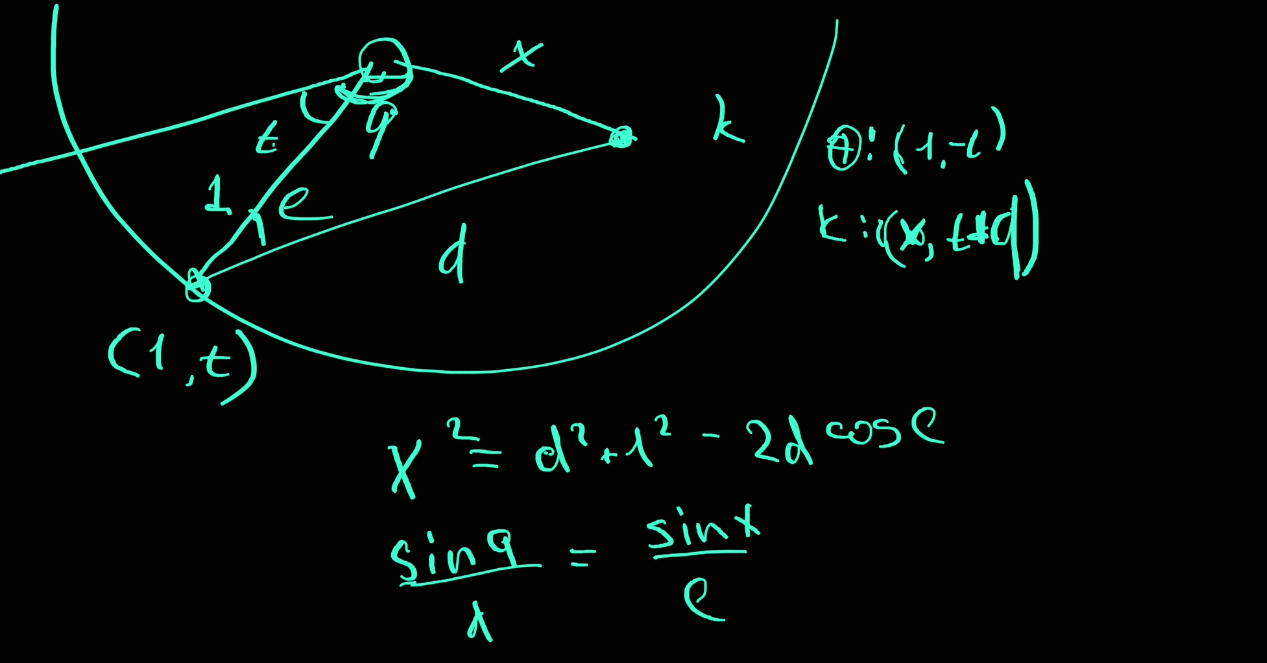

In [64]:
df3['x'] = np.sqrt(df3['D, a. e.']**2 + 1 - 
                   2 * df3['D, a. e.'] * 
                   np.cos(df3['Delta lambda'] / 180*np.pi))

In [115]:
df3['t'] = (df3['Time']-2021)*2*np.pi
# df3['q'] = np.arcsin(df3['D, a. e.']/df3['x'] 
                     # * np.sin(df3['Delta lambda'] / 180*np.pi ))
d = df3['D, a. e.']
x = df3['x']
df3['q'] = np.arccos((d**2-1-x**2)/(-2*x))*np.sign(df3['Delta lambda'])
df3['qt'] = df3['t'] - df3['q']

/home/kv/anaconda3/envs/phot/lib/python3.11/site-packages/matplotlib/patches.py:3164: RuntimeWarning: divide by zero encountered in divide
  vertices = path.vertices / [1, aspect_ratio]


ValueError: 'path' is not a valid quadratic Bezier curve

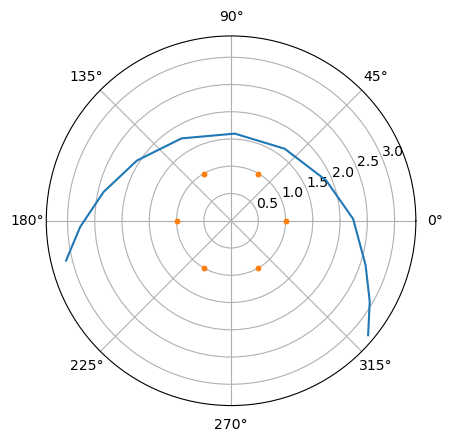

In [217]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection = 'polar')
plt.plot(df3['qt'], df3['x'])
plt.plot(df3['t'], np.ones(df3['t'].shape),'.')
import matplotlib.patches as mpatches
for i in np.arange(len(df3['t'])):
    arrow = mpatches.FancyArrowPatch((df3['t'][i], 1), 
                                     (df3['qt'][i],  df3['x'][i]),
                                    mutation)
    ax.add_patch(arrow)

In [139]:
def d_to_p(x, y):
    '''
    Conversion from cartesian to polar coordinates
    Parameters
    ----------
    x: np.array
    y: np.array

    Returns
    -------
    r: np.array
    phi: np.array
    '''
    r = np.sqrt(x**2+y**2)
    phi = np.atan2(y, x)
    return (r, phi)
def p_to_d(r, phi):
    y = r*np.sin(phi)
    x = r*np.cos(phi) 
    return(x, y)

In [206]:
def plot_planet(X,Y):
    # X, Y = data_mer['x'].values, data_mer['y'].values
    X, Y = X.reshape(X.shape[0], 1), Y.reshape(Y.shape[0], 1)
    A = np.hstack([X**2, X * Y, Y**2, X, Y])
    b = np.ones_like(X)
    x = np.linalg.lstsq(A, b)[0].squeeze()
    x_coord = np.linspace(-5,5,300)
    y_coord = np.linspace(-5,5,300)
    X_coord, Y_coord = np.meshgrid(x_coord, y_coord)
    Z_coord = x[0] * X_coord ** 2 + x[1] * X_coord * Y_coord + x[2] * Y_coord**2 + x[3] * X_coord + x[4] * Y_coord
    plt.contour(phi, r, Z_coord, levels=[1], colors=('r'), linewidths=1)


In [207]:
x, y = p_to_d(df3['x'], df3['qt'])

/tmp/ipykernel_427589/3621019843.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A, b)[0].squeeze()


AttributeError: module 'numpy' has no attribute 'atan2'

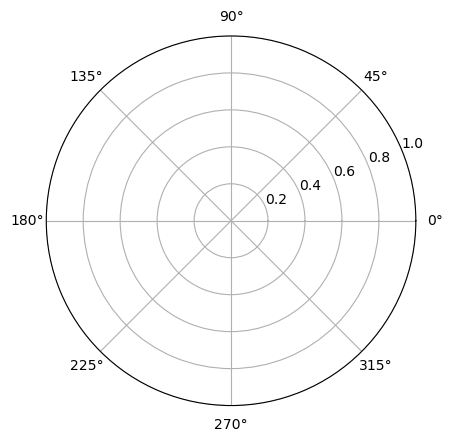

In [208]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = 'polar')
# plt.plot(x,y)
plot_planet(np.array(x),np.array(y))
plt.axis('equal')


In [151]:
np.array(y)

array([-2.10065529, -1.47755675, -0.81313894,  0.03392858,  0.74063399,
        1.32087765,  1.59890838,  1.51126063,  1.10453665,  0.52776177,
       -0.11162421, -0.73051644])